Datasets

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
%matplotlib inline
import numpy as np
# seaborn histogram
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [3]:
import sys
import os
to_insert = os.getcwd()
# to import utils
sys.path.append(to_insert)

Comunities and Crime

race -> racepctblack - 0, racePctWhite - 1, racePctAsian - 2, racePctHisp - 3

In [5]:

column_name = ["state", "county", "community", "communityname", "fold", "population", "householdsize",
               "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29",
               "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf",
               "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap",
               "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov",
               "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
               "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
               "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par",
               "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg",
               "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig",
               "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell",
               "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous",
               "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR",
               "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos",
               "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal",
               "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc",
               "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn",
               "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT",
               "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq",
               "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite",
               "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
               "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars",
               "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn",
               "PolicBudgPerPop", "ViolentCrimesPerPop"]

df = pd.read_csv("../datasets/crime/communities.data", sep=',', names=column_name)
# remove the variables not used for prediction
data = df.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1)

# drop observations with missing values
data = data.replace('?', np.nan)
data = data[data.columns[data.isna().mean(0) < 0.1]]
data = data.replace('?', np.nan).dropna(axis=0, how='any')
dataset = data.astype(float)

# race column
# race -> racepctblack - 0, racePctWhite - 1, racePctAsian - 2, racePctHisp - 3
race = np.argmax(data[['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp']].values, 1)
dataset['race'] = race
dataset['race'] = dataset['race'].apply(lambda x: 1 if x == 1 else 0)

dataset.drop(['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp'], axis=1, inplace=True)

# computing the binary outcome
dataset['ViolentCrimesPerPop_binary'] = dataset['ViolentCrimesPerPop'] >= 0.15
dataset['ViolentCrimesPerPop_binary'] = dataset['ViolentCrimesPerPop_binary'].astype(int)

for e in ['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'ViolentCrimesPerPop', 'state',
          'county', 'community', 'communityname', 'fold']:
    column_name.remove(e)

column_name.append('race')
dataset.reset_index(drop=True, inplace=True)

dataset.head(10)

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,race,ViolentCrimesPerPop_binary
0,0.19,0.33,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,...,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20,1,1
1,0.00,0.16,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,...,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67,1,1
2,0.00,0.42,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58,...,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43,1,1
3,0.04,0.77,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,...,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12,0,0
4,0.01,0.55,0.38,0.38,0.23,0.36,0.02,0.90,0.50,0.72,...,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03,1,0
5,0.02,0.28,0.31,0.48,0.27,0.37,0.04,1.00,0.52,0.68,...,0.49,0.73,0.64,0.01,0.58,0.10,0.00,0.14,0,0
6,0.01,0.39,0.30,0.37,0.23,0.60,0.02,0.81,0.42,0.50,...,0.77,0.91,0.84,0.05,0.08,0.06,0.00,0.03,1,0
7,0.01,0.74,0.52,0.55,0.36,0.35,0.00,0.00,0.16,0.44,...,0.52,0.79,0.78,0.01,0.33,0.00,0.00,0.55,0,1
8,0.03,0.34,0.38,0.45,0.28,0.48,0.04,1.00,0.17,0.47,...,0.48,0.79,0.75,0.04,0.17,0.04,0.00,0.53,1,1
9,0.01,0.40,0.90,0.82,0.80,0.39,0.02,1.00,0.54,0.59,...,0.34,0.23,0.09,0.00,0.47,0.11,0.00,0.15,1,1


In [6]:
dataset.isna().sum()

population                    0
householdsize                 0
agePct12t21                   0
agePct12t29                   0
agePct16t24                   0
                             ..
PctUsePubTrans                0
LemasPctOfficDrugUn           0
ViolentCrimesPerPop           0
race                          0
ViolentCrimesPerPop_binary    0
Length: 99, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: '..datasets_figures/crime.pdf'

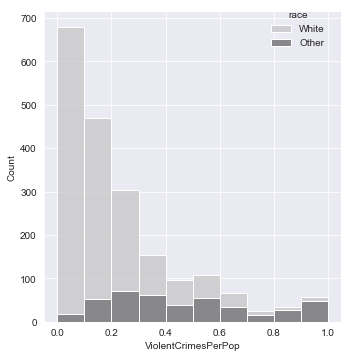

In [7]:
dataset['race'] = dataset['race'].apply(lambda x: 'White' if x == 1 else 'Other')
sns_plot = sns.displot(data=dataset, x = 'ViolentCrimesPerPop', hue='race',
            multiple = 'stack', palette= 'Greys', bins = 10)
sns.move_legend(sns_plot, "upper right", bbox_to_anchor=( .8, 1))
sns_plot.figure.savefig("..datasets_figures/crime.pdf", bbox_inches='tight')

In [ ]:
dataset['race'].describe()

In [ ]:
df = pd.DataFrame(dataset['race'].groupby(dataset['race']).count())
df.rename(columns={'race': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['race', 'ViolentCrimesPerPop_binary']).count())
df.rename(columns={'race': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['race', 'ViolentCrimesPerPop_binary', 'population']]
df['percent'] = 100 * df['population']/df['population'].sum()
df

In [ ]:
explanatory_variables = ['population', 'householdsize', 'agePct12t21', 'agePct12t29',
                                       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
                                       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
                                       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
                                       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
                                       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
                                       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
                                       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
                                       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
                                       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
                                       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
                                       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
                                       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
                                       'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
                                       'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
                                       'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
                                       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
                                       'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
                                       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
                                       'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent',
                                       'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg',
                                       'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState',
                                       'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea',
                                       'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn', 'race']
dataset[explanatory_variables].shape

COMPAS

In [ ]:
df = pd.read_csv("..datasets/compas/compas-scores-two-years.csv", sep=',')

columns = ['sex', 'age', 'age_cat', 'race',
         'juv_fel_count', 'juv_misd_count', 'juv_other_count',
         'priors_count', 'c_charge_degree', 'c_charge_desc',
         'two_year_recid', 'is_recid', 'days_b_screening_arrest',
         'decile_score', 'score_text']
filtered_df = df[columns].loc[(df['days_b_screening_arrest'] <= 30)
                              & (df['days_b_screening_arrest'] >= -30)
                              & (df['is_recid'] != -1)
                              & (df['c_charge_degree'] != "O")
                              & (df['score_text'].notnull())]

filtered_df.reset_index(inplace=True, drop=True)

# sex
gender = filtered_df['sex'].apply(lambda x: 1 if x == 'Female' else 0)
df_gender = gender.to_frame()

# misdemeanor
charge = filtered_df['c_charge_degree'].apply(lambda x: 1 if x == 'M' else 0)
df_charge = charge.to_frame()
df_charge.rename(columns={'c_charge_degree': 'misdemeanor'}, inplace=True)

# race
race = filtered_df['race'].apply(lambda x: 1 if x == 'Caucasian'  else (0 if x == 'African-American' else 2))
# race = filtered_df['race'].apply(lambda x: 0 if x == 'African-American'  else 1)
df_race = race.to_frame()

# Binarizing race and age_cat
lb_style = LabelBinarizer()
lb_age = lb_style.fit_transform(filtered_df['age_cat'])
df_age = pd.DataFrame(lb_age, columns=lb_style.classes_)

# For the binary score we are using Low versus Medium and High
df_base = filtered_df[['two_year_recid', 'priors_count', 'decile_score', 'score_text']]
df_base = df_base.join(df_age).join(df_race).join(df_gender).join(df_charge)
# High >= 8
df_base['binary_score'] = df_base['score_text'].apply(lambda x: 1 if x == 'High' or x == 'Medium' else 0)

# We will take into consideration only Caucasian and African american values of the race attribute.
df_base = df_base.drop(df_base[df_base.race == 2].index)
df_base.reset_index(inplace=True, drop=True)

df_base.head(10)

In [ ]:
visual_p = df_base.groupby(['race','decile_score'])['decile_score'].count()
visual_p_df = pd.DataFrame(visual_p)
visual_p_df.rename({"decile_score": "examples"}, inplace=True, axis=1)
visual_p_df.reset_index(inplace=True)
visual_p_df['race'] = visual_p_df['race'].apply(lambda x: 'Caucasian' if x == 1 else 'African American')
visual_p_df
sns_plot = sns.catplot(x = "decile_score",       # x variable name
            y = "examples",       # y variable name
            hue = "race",  # group variable name
            data = visual_p_df,     # dataframe to plot
            kind = "bar",
            palette= 'Greys',
            legend=True)
sns.move_legend(sns_plot, "upper center", bbox_to_anchor=( .6, 1), )
sns_plot.figure.savefig("..datasets_figures/compas.pdf", bbox_inches='tight')

In [ ]:
df = pd.DataFrame(df_base['race'].groupby(df_base['race']).count())
df.rename(columns={'race': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['race'] = df['race'].apply(lambda x: 'Caucasian' if x == 1 else 'African American')
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(df_base.groupby(['race', 'binary_score']).count())
df.rename(columns={'race': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['race', 'binary_score', 'two_year_recid']]
df['percent'] = 100 * df['two_year_recid']/df['two_year_recid'].sum()
df

In [ ]:
df_base.isna().sum()

In [ ]:
explanatory_variables = ['two_year_recid', 'priors_count', '25 - 45', 'Greater than 45',
                                      'Less than 25', 'race', 'sex', 'misdemeanor']
df_base[explanatory_variables].shape

Drugs

In [ ]:
Cat = 'cat'
Num = 'num'

VARIABLES = {'ID': Cat,  # not used for prediction
             'Age': Num,
             'Gender': Cat,
             'Education': Cat,
             'Country': Cat,
             'Race': Cat,
             'Nscore': Num,
             'Escore': Num,
             'Oscore': Num,
             'Ascore': Num,
             'Cscore': Num,
             'Impulsive': Num,
             'SS': Num,
             # Drug usage outcomes
             'Alcohol': Cat,
             'Amphet': Cat,
             'Amyl': Cat,
             'Benzos': Cat,
             'Caff': Cat,
             'Cannabis': Cat,
             'Choc': Cat,
             'Coke': Cat,
             'Crack': Cat,
             'Ecstasy': Cat,
             'Heroin': Cat,
             'Ketamine': Cat,
             'Legalh': Cat,
             'LSD': Cat,
             'Meth': Cat,
             'Mushrooms': Cat,
             'Nicotine': Cat,
             'Semer': Cat,
             'VSA': Cat
             }

df = pd.read_csv("..datasets/drugs/drug_consumption.data", names=VARIABLES.keys(),
                 sep=',', index_col=0)

vars = {'Age': Num,
        'Gender': Cat,
        'Education': Cat,
        'Country': Cat,
        'Race': Cat,
        'Nscore': Num,
        'Escore': Num,
        'Oscore': Num,
        'Ascore': Num,
        'Cscore': Num,
        'Impulsive': Num,
        'SS': Num,
        'Coke': Cat}

class_map = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
}

gender_tr = {
    0.48246: 'Female',  # 49.97%
    -0.48246: 'Male'}  # 50.03%

dataset = df[list(vars.keys())]
dataset.loc[:, 'Gender'] = (dataset['Gender'] == 0.48246).astype(float)
dataset.loc[:, 'Coke'] = [class_map[item] for item in dataset['Coke']]

# computing the binary outcome
dataset['Coke_binary'] = dataset['Coke'] > 3
dataset['Coke_binary'] = dataset['Coke_binary'].astype(int)

dataset.head(10)

In [ ]:
dataset.isna().sum()

In [ ]:
visual_p = dataset.groupby(['Gender','Coke'])['Coke'].count()
visual_p_df = pd.DataFrame(visual_p)
visual_p_df.rename({"Coke": "examples"}, inplace=True, axis=1)
visual_p_df.reset_index(inplace=True)
visual_p_df['Gender'] = visual_p_df['Gender'].apply(lambda x: 'Female' if x == 1 else 'Male')
visual_p_df
sns_plot = sns.catplot(x = "Coke",       # x variable name
            y = "examples",       # y variable name
            hue = "Gender",  # group variable name
            data = visual_p_df,     # dataframe to plot
            kind = "bar",
            palette= 'Greys',
            legend=True)
sns.move_legend(sns_plot, "upper center", bbox_to_anchor=( .6, 1), )
sns_plot.figure.savefig("..datasets_figures/drugs.pdf", bbox_inches='tight')

In [ ]:
df = pd.DataFrame(dataset['Gender'].groupby(dataset['Gender']).count())
df.rename(columns={'Gender': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 1 else 'Male')
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['Gender', 'Coke_binary']).count())
df.rename(columns={'Gender': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['Gender', 'Coke_binary', 'Race']]
df['percent'] = 100 * df['Race']/df['Race'].sum()
df

In [ ]:
explanatory_variables = ['Age', 'Gender', 'Education', 'Country', 'Race', 'Nscore', 'Escore', 'Oscore',
                                       'Ascore', 'Cscore', 'Impulsive', 'SS']
dataset[explanatory_variables].shape


Insurance

In [41]:
df = pd.read_csv("..datasets/insurance/insurance.csv", sep=',')

cat_vars = ['sex', 'smoker', 'region']
num_vars = ['age', 'children', 'bmi', 'charges']

cat_encoder = OneHotEncoder(sparse=False, drop='first')
cat_data = cat_encoder.fit_transform(df[cat_vars])

catnewcols = np.concatenate(
    [[cat] if len(item) == 2 else [cat + '_' + cn for cn in item[1:]] for cat, item in
     zip(cat_vars, cat_encoder.categories_)]).tolist()

cat_df = pd.DataFrame(cat_data, columns=catnewcols)

dataset = pd.concat([df[num_vars], cat_df], axis=1)

# computing the binary outcome - 3rd percentile
dataset['charges_binary'] = dataset['charges'] > 40000
dataset['charges_binary'] = dataset['charges_binary'].astype(int)
dataset.reset_index(drop=True, inplace=True)

dataset.head(10)

,age,children,bmi,charges,sex,smoker,region_northwest,region_southeast,region_southwest,charges_binary
0,19,0,27.900,16884.92400,0.0,1.0,0.0,0.0,1.0,0
1,18,1,33.770,1725.55230,1.0,0.0,0.0,1.0,0.0,0
2,28,3,33.000,4449.46200,1.0,0.0,0.0,1.0,0.0,0
3,33,0,22.705,21984.47061,1.0,0.0,1.0,0.0,0.0,0
4,32,0,28.880,3866.85520,1.0,0.0,1.0,0.0,0.0,0
5,31,0,25.740,3756.62160,0.0,0.0,0.0,1.0,0.0,0
6,46,1,33.440,8240.58960,0.0,0.0,0.0,1.0,0.0,0
7,37,3,27.740,7281.50560,0.0,0.0,1.0,0.0,0.0,0
8,37,2,29.830,6406.41070,1.0,0.0,0.0,0.0,0.0,0
9,60,0,25.840,28923.13692,0.0,0.0,1.0,0.0,0.0,0


In [42]:
dataset.isna().sum()

age                 0
children            0
bmi                 0
charges             0
sex                 0
smoker              0
region_northwest    0
region_southeast    0
region_southwest    0
charges_binary      0
dtype: int64

In [ ]:
sns.distplot(dataset['charges'], hist=True, kde=False,
             bins=int(10), color = 'blue',
             hist_kws={'edgecolor':'black'})

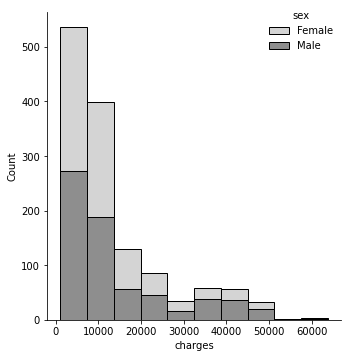

In [43]:
dataset['sex'] = dataset['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
sns_plot = sns.displot(data=dataset, x = 'charges', hue='sex',
            multiple = 'stack', palette= 'Greys', bins = 10)
sns.move_legend(sns_plot, "upper right", bbox_to_anchor=( .8, 1))
#sns_plot.figure.savefig("..datasets_figures/insurance.pdf", bbox_inches='tight')

In [44]:
dataset['sex'].describe()

count     1338
unique       2
top       Male
freq       676
Name: sex, dtype: object

In [45]:
df = pd.DataFrame(dataset['sex'].groupby(dataset['sex']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

,sex,num_values,percent
0,Female,662,49.476831
1,Male,676,50.523169


In [46]:
df = pd.DataFrame(dataset.groupby(['sex', 'charges_binary']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['sex', 'charges_binary', 'children']]
df['percent'] = 100 * df['children']/df['children'].sum()
df

,sex,charges_binary,children,percent
0,Female,0,630,47.085202
1,Female,1,32,2.391629
2,Male,0,629,47.010463
3,Male,1,47,3.512706


In [47]:
explanatory_variables = ['age', 'children', 'bmi', 'sex', 'smoker',
                         'region_northwest', 'region_southeast', 'region_southwest']
dataset[explanatory_variables].shape

(1338, 8)

TIC NL insurance

In [ ]:
variable_names = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV',
                          'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG',
                          'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG',
                          'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
                          'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M',
                          'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO',
                          'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
                          'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART',
                          'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR',
                          'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
                          'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN']

df = pd.read_csv("..datasets/tic/ticdata2000.txt", sep='\t',
                 names=variable_names)

variable_names_tst = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV',
                      'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG',
                      'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG',
                      'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
                      'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512',
                      'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT',
                      'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
                      'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND',
                      'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG',
                      'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
                      'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']
df_tst = pd.read_csv("..datasets/tic/ticeval2000.txt", sep='\t',
                     names=variable_names_tst)

var_obj = ['CARAVAN']
df_obj = pd.read_csv("..datasets/tic/tictgts2000.txt", sep='\t', names=var_obj)

df_tst_all = pd.concat([df_tst, df_obj], axis=1)
dataset = pd.concat([df, df_tst_all])
dataset.reset_index(inplace=True)
dataset.drop('index', axis=1, inplace=True)

variable_names_data = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV',
                       'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG',
                       'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG',
                       'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
                       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512',
                       'MINK123M', 'MINKGEM', 'MKOOPKLA']
dataset = dataset[variable_names_data]

# religion
# 6 MGODRK Roman catholic see L3
# 7 MGODPR Protestant ...
# 8 MGODOV Other religion
# 9 MGODGE No religion
max_religion = dataset[['MGODRK', 'MGODPR', 'MGODOV', 'MGODGE']].idxmax(axis=1)
dataset['religion'] = max_religion
dataset['religion'] = dataset['religion'].apply(lambda x: 0 if x == 'MGODGE' else 1)
dataset.drop(['MGODRK', 'MGODPR', 'MGODOV', 'MGODGE'], axis=1, inplace=True)

# income
# 37 MINKM30 Income < 30.000
# 38 MINK3045 Income 30-45.000
# 39 MINK4575 Income 45-75.000
# 40 MINK7512 Income 75-122.000
# 41 MINK123M Income >123.000
# 42 MINKGEM Average income
# 43 MKOOPKLA Purchasing power class
# data range
# 0 - 0 %
# 1 - 1 - 10 %
# 2 - 11 - 23 %
# 3 - 24 - 36 %
# 4 - 37 - 49 %
# 5 - 50 - 62 %
# 6 - 63 - 75 %
# 7 - 76 - 88 %
# 8 - 89 - 99 %
# 9 - 100 %
dataset['income'] = dataset[['MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M']].max(axis=1)
dataset.drop(['MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA'], axis=1, inplace=True)

# computing the binary outcome
dataset['income_binary'] = dataset['income'] > 6
dataset['income_binary'] = dataset['income_binary'].astype(int)

# delete income 2 case there is only one case
dataset = dataset.loc[dataset['income'] > 2]

dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset.head(10)

In [ ]:
visual_p = dataset.groupby(['religion','income'])['income'].count()
visual_p_df = pd.DataFrame(visual_p)
visual_p_df.rename({"income": "examples"}, inplace=True, axis=1)
visual_p_df.reset_index(inplace=True)
visual_p_df['religion'] = visual_p_df['religion'].apply(lambda x: 'No Religious' if x == 0 else 'Religious')
visual_p_df
sns_plot = sns.catplot(x = "income",       # x variable name
            y = "examples",       # y variable name
            hue = "religion",  # group variable name
            data = visual_p_df,     # dataframe to plot
            kind = "bar",
            palette= 'Greys',
            legend=True)
sns.move_legend(sns_plot, "upper center", bbox_to_anchor=( .6, 1), )
sns_plot.figure.savefig("..datasets_figures/tic.pdf", bbox_inches='tight')

In [ ]:
df = pd.DataFrame(dataset['religion'].groupby(dataset['religion']).count())
df.rename(columns={'religion': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['religion'] = df['religion'].apply(lambda x: 'No Religious' if x == 0 else 'Religious')
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['religion', 'income_binary']).count())
df.rename(columns={'religion': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['religion', 'income_binary', 'MOSTYPE']]
df['percent'] = 100 * df['MOSTYPE']/df['MOSTYPE'].sum()
df

In [ ]:
dataset.isna().sum()

In [ ]:
explanatory_variables = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
                               'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG',
                               'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG',
                               'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
                               'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'religion']
dataset[explanatory_variables].shape

In [ ]:
dataset['income'].groupby(dataset.income).count()


LSAT

In [ ]:
df = pd.read_csv("..datasets/lsat/bar_pass_prediction.csv", sep=',')
data = df[['race1', 'gender', 'age', 'fam_inc', 'fulltime', 'zgpa', 'ugpa', 'lsat']]
data = data.dropna(axis=0).reset_index()

race_map = {'asian': 0,
            'black': 1,
            'hisp': 2,
            'other': 3,
            'white': 4}
race = [race_map[r] for r in data['race1']]

cat_vars = ['gender', 'fulltime']
num_vars = ['age', 'fam_inc', 'zgpa', 'ugpa', 'lsat']

cat_encoder = OneHotEncoder(sparse=False, drop='first')

cat_data = cat_encoder.fit_transform(data[cat_vars])

catnewcols = np.concatenate(
    [[cat] if len(item) == 2 else [cat + '_' + cn for cn in item[1:]] for cat, item in
     zip(cat_vars, cat_encoder.categories_)]).tolist()

cat_df = pd.DataFrame(cat_data, columns=catnewcols)

dataset = pd.concat([data[num_vars], cat_df], axis=1)
dataset['race'] = race
dataset['race'] = dataset['race'].apply(lambda x: 1 if x == 4 else 0)


# computing the binary outcome
# TODO qué es un lsat bueno? 37 is the mean 2nd quartile
# dataset['lsat_binary'] = dataset['lsat'] >= 37
# dataset['lsat_binary'] = dataset['lsat_binary'].astype(int)

dataset['lsat_binary'] = dataset['ugpa'] >= 3.2
dataset['lsat_binary'] = dataset['lsat_binary'].astype(int)

dataset.reset_index(drop=True, inplace=True)
dataset.head(10)


In [ ]:
dataset.isna().sum()

In [ ]:
sns.distplot(dataset['ugpa'], hist=True, kde=False,
             bins=int(10), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
dataset['ugpa'].describe()

In [ ]:
dataset['race'] = dataset['race'].apply(lambda x: 'White' if x == 1 else 'Other')
sns_plot = sns.displot(data=dataset, x = 'ugpa', hue='race',
            multiple = 'stack', palette= 'Greys', bins = 10)
sns.move_legend(sns_plot, "upper right", bbox_to_anchor=( .8, 1))
sns_plot.figure.savefig("..datasets_figures/lsat.pdf", bbox_inches='tight')

In [ ]:
dataset['race'].describe()

In [ ]:
df = pd.DataFrame(dataset['race'].groupby(dataset['race']).count())
df.rename(columns={'race': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['race', 'lsat_binary']).count())
df.rename(columns={'race': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['race', 'lsat_binary', 'age']]
df['percent'] = 100 * df['age']/df['age'].sum()
df

In [ ]:
explanatory_variables = ['age', 'fam_inc', 'zgpa', 'gender', 'fulltime', 'race']
dataset[explanatory_variables].shape

Obesity

In [ ]:
df = pd.read_csv("..datasets/obesity/ObesityDataSet_raw_and_data_sinthetic.csv", sep=',')

# We categorized as 5 the obesity types 2 and 3.
label_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 5}

cat = 'categorical'
num = 'numeric'
unique_counter = df.apply(lambda col: len(set(col)), axis=0)
variables = {}
for key, val in unique_counter.iteritems():
    variables[key] = (cat, val) if val < 20 else (num, None)

target = np.array([label_map[t] for t in df['NObeyesdad']])
gender = (df['Gender'] != 'Female').astype(float)

df_ = df.drop(['NObeyesdad', 'Gender'], axis=1)
df_.loc[df_['CALC'] == 'Always', 'CALC'] = 'Frequently'

# categorical columns
catcols = [var for var in variables if variables[var][0] == cat if var in df_]
cat_encoder = OneHotEncoder(sparse=False, drop='first')
df_cat = cat_encoder.fit_transform(df_[catcols])
cat_new_cols = np.concatenate(
    [[cat] if len(item) == 2 else [cat + '_' + cn for cn in item[1:]] for cat, item in
     zip(catcols, cat_encoder.categories_)]).tolist()
cat_df = pd.DataFrame(df_cat, columns=cat_new_cols)

# numerical columns
numcols = [var for var in variables if variables[var][0] == num if var in df_]

dataset = pd.concat([df_[numcols], cat_df], axis=1)

dataset['Gender'] = gender
dataset['NObeyesdad'] = target

# computing the binary outcome
dataset['NObeyesdad_binary'] = dataset['NObeyesdad'] > 3
dataset['NObeyesdad_binary'] = dataset['NObeyesdad_binary'].astype(int)

dataset.reset_index(drop=True, inplace=True)

dataset.head(10)

In [ ]:
dataset.shape

In [ ]:
dataset.isna().sum()

In [ ]:
dataset['NObeyesdad'].groupby(dataset.NObeyesdad).count()

In [ ]:
visual_p = dataset.groupby(['Gender','NObeyesdad'])['NObeyesdad'].count()
visual_p_df = pd.DataFrame(visual_p)
visual_p_df.rename({"NObeyesdad": "examples"}, inplace=True, axis=1)
visual_p_df.reset_index(inplace=True)
visual_p_df['Gender'] = visual_p_df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')
visual_p_df
sns_plot = sns.catplot(x = "NObeyesdad",       # x variable name
            y = "examples",       # y variable name
            hue = "Gender",  # group variable name
            data = visual_p_df,     # dataframe to plot
            kind = "bar",
            palette= 'Greys',
            legend=True)
sns.move_legend(sns_plot, "upper center", bbox_to_anchor=( .6, 1), )
sns_plot.figure.savefig("..datasets_figures/obesity.pdf", bbox_inches='tight')

In [ ]:
df = pd.DataFrame(dataset['Gender'].groupby(dataset['Gender']).count())
df.rename(columns={'Gender': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['Gender', 'NObeyesdad_binary']).count())
df.rename(columns={'Gender': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['Gender', 'NObeyesdad_binary', 'Age']]
df['percent'] = 100 * df['Age']/df['Age'].sum()
df

In [ ]:
explanatory_variables = ['family_history_with_overweight', 'FAVC', 'CAEC_Frequently', 'CAEC_Sometimes',
                                       'CAEC_no', 'SMOKE', 'SCC', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
                                       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
                                       'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender']
dataset[explanatory_variables].shape



Older adults

In [ ]:
df = pd.read_csv("..datasets/olderadults/older_adults.csv", sep=';')

columns = ['HEIGHT', 'WEIGHT', 'B-CURLS', '6 MInWk', '6 STEPS', '10 METRE', 'TIMED UP&GO', '5 Sit to Stands',
           'SIT TO STAND', 'GRIP LEFT', 'GRIP RIGHT', 'FR1', 'FR2', 'FR3', 'SEX ', 'TOTAL MISTAKES']

data = df[columns]

dataset = pd.DataFrame()
for c in columns:
    if data[c].dtypes == 'O':
        new_col = data[c].apply(lambda x: float(x.replace(',', '.')))
        dataset[c] = new_col
    else:
        dataset[c] = data[c]

dataset.rename(columns={'TOTAL MISTAKES': 'mistakes'}, inplace=True)
dataset.rename(columns={'SEX ': 'sex'}, inplace=True)


# computing the binary outcome
dataset['mistakes_binary'] = dataset['mistakes'] >= 8
dataset['mistakes_binary'] = dataset['mistakes_binary'].astype(int)

dataset.reset_index(drop=True, inplace=True)
dataset.head(10)

In [ ]:
dataset.isna().sum()

In [ ]:
sns.distplot(dataset['mistakes'], hist=True, kde=False,
             bins=int(10), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
dataset['mistakes'].describe()

In [ ]:
dataset['sex'] = dataset['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
sns_plot = sns.displot(data=dataset, x = 'mistakes', hue='sex',
            multiple = 'stack', palette= 'Greys', bins = 10)
sns.move_legend(sns_plot, "upper right", bbox_to_anchor=( .8, 1))
sns_plot.figure.savefig("..datasets_figures/older-adults.pdf", bbox_inches='tight')

In [ ]:
dataset['sex'].describe()

In [ ]:
df = pd.DataFrame(dataset['sex'].groupby(dataset['sex']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['sex', 'mistakes_binary']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['sex', 'mistakes_binary', 'WEIGHT']]
df['percent'] = 100 * df['WEIGHT']/df['WEIGHT'].sum()
df

In [ ]:
explanatory_variables = ['HEIGHT', 'WEIGHT', 'B-CURLS', '6 MInWk', '6 STEPS', '10 METRE',
                                       'TIMED UP&GO', '5 Sit to Stands', 'SIT TO STAND', 'GRIP LEFT',
                                       'GRIP RIGHT', 'FR1', 'FR2', 'FR3', 'sex']
dataset[explanatory_variables].shape

Parkinson

In [ ]:
df = pd.read_csv("..datasets/parkinson/parkinsons_updrs.data", sep=',')

dataset = df.drop(['subject#', 'motor_UPDRS', 'test_time'], axis=1)


# computing the binary outcome
dataset['total_UPDRS_binary'] = dataset['total_UPDRS'] >= 17.1
dataset['total_UPDRS_binary'] = dataset['total_UPDRS_binary'].astype(int)

dataset.reset_index(drop=True, inplace=True)
dataset.head(10)

In [ ]:
dataset.isna().sum()

In [ ]:
sns.distplot(dataset['total_UPDRS'], hist=True, kde=False,
             bins=int(10), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [ ]:
dataset['total_UPDRS'].describe()

In [ ]:
dataset['sex'] = dataset['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
sns_plot = sns.displot(data=dataset, x = 'total_UPDRS', hue='sex',
            multiple = 'stack', palette= 'Greys', bins = 10)
sns.move_legend(sns_plot, "upper right", bbox_to_anchor=( .8, 1))
sns_plot.figure.savefig("..datasets_figures/parkinson.pdf", bbox_inches='tight')

In [ ]:
dataset['sex'].describe()

In [ ]:
df = pd.DataFrame(dataset['sex'].groupby(dataset['sex']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['sex', 'total_UPDRS_binary']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['sex', 'total_UPDRS_binary', 'age']]
df['percent'] = 100 * df['age']/df['age'].sum()
df

In [ ]:
explanatory_variables = ['age', 'sex', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
                                       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
                                       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
                                       'DFA', 'PPE']
dataset[explanatory_variables].shape


singles

In [ ]:
columns = ['income', 'sex', 'marital', 'age', 'educ', 'occup', 'resid', 'dualInc', 'perInHou',
                   'under18', 'homeStatus', 'homeType', 'ethnic', 'language']
df_s = pd.read_csv("..datasets/singlesincome/data.csv", sep=',', names=columns)

# Keep only the singles
dataset = df_s.loc[df_s.marital == 5]
dataset.drop(['marital'], axis=1, inplace=True)

# Change codification for sex:
gender = (df_s['sex'] == 1).astype(float) # Male = 1
dataset.drop(['sex'], axis=1, inplace=True)
dataset['sex'] = gender

# Remove nan values
dataset.dropna(inplace=True)

# annual income
# 1.Less than $10, 000
# 2. $10, 000to $14, 999
# 3. $15, 000to $19, 999
# 4. $20, 000to $24, 999
# 5. $25, 000to $29, 999
# 6. $30, 000to $39, 999
# 7. $40, 000 to $49, 999
# 8. $50, 000 to $74, 999
# 9. $75, 000 or more
# computing the binary outcome
dataset['income_binary'] = dataset['income'] > 4
dataset['income_binary'] = dataset['income_binary'].astype(int)

dataset.reset_index(drop=True, inplace=True)

dataset.head(10)

In [ ]:
dataset['income'].groupby(dataset.income).count()

In [ ]:
visual_p = dataset.groupby(['sex','income'])['income'].count()
visual_p_df = pd.DataFrame(visual_p)
visual_p_df.rename({"income": "examples"}, inplace=True, axis=1)
visual_p_df.reset_index(inplace=True)
visual_p_df['race'] = visual_p_df['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
visual_p_df
sns_plot = sns.catplot(x = "income",       # x variable name
            y = "examples",       # y variable name
            hue = "sex",  # group variable name
            data = visual_p_df,     # dataframe to plot
            kind = "bar",
            palette= 'Greys',
            legend=True)
sns.move_legend(sns_plot, "upper center", bbox_to_anchor=( .6, 1), )
sns_plot.figure.savefig("..datasets_figures/singles.pdf", bbox_inches='tight')

In [ ]:
df = pd.DataFrame(dataset['sex'].groupby(dataset['sex']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['sex'] = df['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['sex', 'income_binary']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['sex', 'income_binary', 'age']]
df['percent'] = 100 * df['age']/df['age'].sum()
df

In [ ]:
dataset.isna().sum()

In [ ]:
explanatory_variables = ['sex', 'age', 'educ', 'occup', 'resid', 'dualInc', 'perInHou',
                         'under18', 'homeStatus', 'homeType', 'ethnic', 'language']
dataset[explanatory_variables].shape


Student

In [ ]:
df = pd.read_csv("..datasets/student/student-por.csv", sep=';')

drop_col = ['school', 'G1', 'G2']
df.drop(drop_col, axis=1, inplace=True)

numeric_columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout",
                   "Dalc", "Walc", "health", "absences", "G3"]
categorical_columns = ["sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian",
                       "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

cat_encoder = OneHotEncoder(sparse=False, drop='first')
cat_data = cat_encoder.fit_transform(df[categorical_columns])
catnewcols = np.concatenate(
    [[cat] if len(item) == 2 else [cat + '_' + cn for cn in item[1:]] for cat, item in
     zip(categorical_columns, cat_encoder.categories_)]).tolist()

cat_df = pd.DataFrame(cat_data, columns=catnewcols)

dataset = pd.concat([df[numeric_columns], cat_df], axis=1)

# computing the binary outcome
dataset['G3_binary'] = dataset['G3'] >= 12
dataset['G3_binary'] = dataset['G3_binary'].astype(int)

dataset.reset_index(drop=True, inplace=True)
dataset.head(10)


In [ ]:
dataset.isna().sum()

In [ ]:
sns.distplot(dataset['G3'], hist=True, kde=False,
             bins=int(10), color = 'blue',
             hist_kws={'edgecolor':'black'})


In [ ]:
dataset['sex'] = dataset['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')
sns_plot = sns.displot(data=dataset, x = 'G3', hue='sex',
            multiple = 'stack', palette= 'Greys', bins = 10)
sns.move_legend(sns_plot, "upper right", bbox_to_anchor=( .8, 1))
sns_plot.figure.savefig("..datasets_figures/student.pdf", bbox_inches='tight')

In [ ]:
dataset['sex'].describe()

In [ ]:
df = pd.DataFrame(dataset['sex'].groupby(dataset['sex']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

In [ ]:
df = pd.DataFrame(dataset.groupby(['sex', 'G3_binary']).count())
df.rename(columns={'sex': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['sex', 'G3_binary', 'age']]
df['percent'] = 100 * df['age']/df['age'].sum()
df

In [ ]:
explanatory_variables = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                                       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'sex',
                                       'address', 'famsize', 'Pstatus', 'Mjob_health', 'Mjob_other',
                                       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
                                       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
                                       'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup',
                                       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
                                       'romantic']
dataset[explanatory_variables].shape

Wine

In [3]:
df_red = pd.read_csv("..datasets/wine/winequality-red.csv", sep=';')
df_white = pd.read_csv("..datasets/wine/winequality-white.csv", sep=';')

# red -> 1
# white -> 0
df_red['color'] = 1
df_white['color'] = 0

dataset = pd.concat([df_red, df_white], ignore_index=True)

# We left out category 9 wine - there only white wines there
dataset = dataset.drop(dataset[dataset.quality == 9].index)
dataset.reset_index(inplace=True, drop=True)

# computing the binary outcome
dataset['quality_binary'] = dataset['quality'] > 5
dataset['quality_binary'] = dataset['quality_binary'].astype(int)

dataset.reset_index(drop=True, inplace=True)

dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1,0


In [4]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
quality_binary          0
dtype: int64

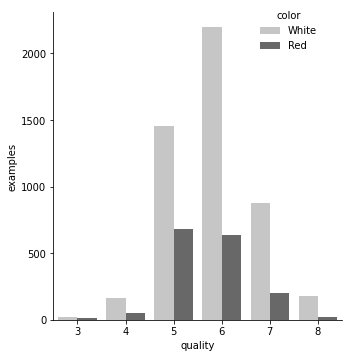

In [5]:
visual_p = dataset.groupby(['color','quality'])['quality'].count()
visual_p_df = pd.DataFrame(visual_p)
visual_p_df.rename({"quality": "examples"}, inplace=True, axis=1)
visual_p_df.reset_index(inplace=True)
visual_p_df['color'] = visual_p_df['color'].apply(lambda x: 'Red' if x == 1 else 'White')
visual_p_df
sns_plot = sns.catplot(x = "quality",       # x variable name
            y = "examples",       # y variable name
            hue = "color",  # group variable name
            data = visual_p_df,     # dataframe to plot
            kind = "bar",
            palette= 'Greys',
            legend=True)
sns.move_legend(sns_plot, "upper right", bbox_to_anchor=( .8, 1), )
#sns_plot.figure.savefig("..datasets_figures/wine.pdf", bbox_inches='tight')

In [6]:
df = pd.DataFrame(dataset['color'].groupby(dataset['color']).count())
df.rename(columns={'color': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df['color'] = df['color'].apply(lambda x: 'Red' if x == 1 else 'White')
df['percent'] = 100 * df['num_values']/df['num_values'].sum()
df

,color,num_values,percent
0,White,4893,75.369686
1,Red,1599,24.630314


In [7]:
df = pd.DataFrame(dataset.groupby(['color', 'quality_binary']).count())
df.rename(columns={'color': 'num_values'}, inplace=True)
df.reset_index(inplace=True)
df = df [['color', 'quality_binary', 'chlorides']]
df['percent'] = 100 * df['chlorides']/df['chlorides'].sum()
df



,color,quality_binary,chlorides,percent
0,0,0,1640,25.261861
1,0,1,3253,50.107825
2,1,0,744,11.460259
3,1,1,855,13.170055


Drug Consumption

Gender Female = 1
Male 0

In [ ]:
Cat = 'cat'
Num = 'num'

VARIABLES = {'ID': Cat,  # not used for prediction
             'Age': Num,
             'Gender': Cat,
             'Education': Cat,
             'Country': Cat,
             'Race': Cat,
             'Nscore': Num,
             'Escore': Num,
             'Oscore': Num,
             'Ascore': Num,
             'Cscore': Num,
             'Impulsive': Num,
             'SS': Num,
             # Drug usage outcomes
             'Alcohol': Cat,
             'Amphet': Cat,
             'Amyl': Cat,
             'Benzos': Cat,
             'Caff': Cat,
             'Cannabis': Cat,
             'Choc': Cat,
             'Coke': Cat,
             'Crack': Cat,
             'Ecstasy': Cat,
             'Heroin': Cat,
             'Ketamine': Cat,
             'Legalh': Cat,
             'LSD': Cat,
             'Meth': Cat,
             'Mushrooms': Cat,
             'Nicotine': Cat,
             'Semer': Cat,
             'VSA': Cat
             }

df = pd.read_csv("..datasets/drugs/drug_consumption.data", names=VARIABLES.keys(),
                 sep=',', index_col=0)

vars = {'Age': Num,
        'Gender': Cat,
        'Education': Cat,
        'Country': Cat,
        'Race': Cat,
        'Nscore': Num,
        'Escore': Num,
        'Oscore': Num,
        'Ascore': Num,
        'Cscore': Num,
        'Impulsive': Num,
        'SS': Num,
        'Coke': Cat}

class_map = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
}

gender_tr = {
    0.48246: 'Female',  # 49.97%
    -0.48246: 'Male'}  # 50.03%

dataset = df[list(vars.keys())]
dataset.loc[:, 'Gender'] = (dataset['Gender'] != 0.48246).astype(float)
dataset.loc[:, 'Coke'] = [class_map[item] for item in dataset['Coke']]

# computing the binary outcome
dataset['Coke_binary'] = dataset['Coke'] > 2
dataset['Coke_binary'] = dataset['Coke_binary'].astype(int)

dataset.reset_index(drop=True, inplace=True)

dataset.head(10)

In [ ]:
gender_tr = {
    0.48246: 'Female',  # 49.97%
    -0.48246: 'Male'}  # 50.03%

# Not sure if I should transform this into categories
education_tr = {
    -2.43591: 'Left school before 16',
    -1.73790: 'Left school at 16',
    -1.43719: 'Left school at 17',
    -1.22751: 'Left school at 18',
    -0.61113: 'Some college or university, no certificate or degree',
    -0.05921: 'Professional certificate / diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree'}

country_tr = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'}

race_tr = {
    -0.50212: 'Asian',  # 1.38% (  26)
    -1.10702: 'Black',  # 1.75% (  33)
    1.90725: 'Mixed-Black/Asian',  # 0.16% (   3)
    0.12600: 'Mixed-White/Asian',  # 1.06% (  20)
    -0.22166: 'Mixed-White/Black',  # 1.06% (  20)
    0.11440: 'Other',  # 3.34% (  63)
    -0.31685: 'White'}  # 91.25% (1720)

# because of the scarcity we may want to try just white vs. others
race_bin_tr = {
    -0.50212: 'Non-white',  # 1.38% (  26)
    -1.10702: 'Non-white',  # 1.75% (  33)
    1.90725: 'Non-white',  # 0.16% (   3)
    0.12600: 'Non-white',  # 1.06% (  20)
    -0.22166: 'Non-white',  # 1.06% (  20)
    0.11440: 'Non-white',  # 3.34% (  63)
    -0.31685: 'White'}  # 91.25% (1720)

class_map = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
}

In [ ]:
vars = {'Age': Num,
     'Gender': Cat,
     'Education': Cat,
     'Country': Cat,
     'Race': Cat,
     'Nscore': Num,
     'Escore': Num,
     'Oscore': Num,
     'Ascore': Num,
     'Cscore': Num,
     'Impulsive': Num,
     'SS': Num,
     'Coke': Cat   }

In [ ]:
list(vars.keys())

In [ ]:
data = df[list(vars.keys())]
data.head()

In [ ]:
data.loc[:, 'Gender'] = (data['Gender'] == 0.48246).astype(float)
data.loc[:,'Coke'] = [class_map[item] for item in data['Coke']]

In [ ]:
data.head()

In [ ]:
data.isna().sum()

In [ ]:
data.shape

In [ ]:
all_df.to_csv("/Users/juls/Desktopdatasets/21_drugs_r/drugs.csv", index=False)
all_df.to_csv("../datasets/drugs.csv", index=False)

Chicago crimes

In [ ]:
df = pd.read_csv("/Users/juls/Desktopdatasets/18_chicago/crimes.csv", sep=',')
df.head(10)

Insurance company

In [ ]:
variable_names = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN']

df = pd.read_csv("/Users/juls/Desktopdatasets/22_insurancenl/tic/ticdata2000.txt", sep='\t', names=variable_names)
df.head(10)

In [ ]:
df.shape

In [ ]:
variable_names_tst = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']
df_tst = pd.read_csv("/Users/juls/Desktopdatasets/22_insurancenl/tic/ticeval2000.txt", sep='\t', names=variable_names_tst)
df_tst.head(10)


In [ ]:
var_obj = ['CARAVAN']
df_obj = pd.read_csv("/Users/juls/Desktopdatasets/22_insurancenl/tic/tictgts2000.txt", sep='\t', names=var_obj)
df_obj.head(10)

In [ ]:
df_tst_all = pd.concat([df_tst, df_obj], axis=1)
df_tst_all.shape

In [ ]:
df_all = pd.concat([df, df_tst_all])
df_all.reset_index(inplace=True)
df_all.drop('index', axis=1, inplace=True)

In [ ]:
variable_names_data = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA']
df_all= df_all[variable_names_data]

possible predictions

In [ ]:
# average income -> MINKGEM
# MKOOPKLA Purchasing power class
# 37 MINKM30 Income < 30.000
# 38 MINK3045 Income 30-45.000
# 39 MINK4575 Income 45-75.000
# 40 MINK7512 Income 75-122.000
# 41 MINK123M Income >123.000
# 42 MINKGEM Average income
# 43 MKOOPKLA Purchasing power class

# L3:
# 0 0%
# 1 1 - 10%
# 2 11 - 23%
# 3 24 - 36%
# 4 37 - 49%
# 5 50 - 62%
# 6 63 - 75%
# 7 76 - 88%
# 8 89 - 99%
# 9 100%

df_all['MINKGEM'].groupby(df_all['MINKGEM']).count()

In [ ]:
# quedarse con la de mayor valor

# 6 MGODRK Roman catholic see L3
# 7 MGODPR Protestant ...
# 8 MGODOV Other religion
# 9 MGODGE No religion

df_all[['MGODRK', 'MGODPR', 'MGODOV', 'MGODGE']]

In [ ]:
max_religion = df_all[['MGODRK', 'MGODPR', 'MGODOV', 'MGODGE']].idxmax(axis=1)
max_religion

In [ ]:
code_religion = {'MGODRK': 0, 'MGODPR':1, 'MGODOV':2, 'MGODGE':3}
max_religion

In [ ]:
df_all['religion'] = max_religion


In [ ]:
df_all.groupby(df_all['religion']).count()

In [ ]:
df_all['religion'] = df_all['religion'].apply(lambda x: 0 if x == 'MGODGE' else 1)

In [ ]:
df_all.shape

In [ ]:
df_all.drop(['MGODRK', 'MGODPR', 'MGODOV', 'MGODGE'], axis=1, inplace=True)
df_all.shape

In [ ]:
# 37 MINKM30 Income < 30.000
# 38 MINK3045 Income 30-45.000
# 39 MINK4575 Income 45-75.000
# 40 MINK7512 Income 75-122.000
# 41 MINK123M Income >123.000
# 42 MINKGEM Average income
# 43 MKOOPKLA Purchasing power class

df_all[['MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA']]

In [ ]:
df_all['max_income'] = df_all[['MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M']].max(axis=1)
#df_all.drop(['MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA'], axis=1, inplace=True)
df_all.shape

In [ ]:
df_all

In [ ]:
all_df.to_csv("/Users/juls/Desktopdatasets/22_insurancenl/insurancenl.csv", index=False)
all_df.to_csv("../datasets/insurancenl.csv", index=False)

In [ ]:
df = pd.read_csv("../datasets/wine.csv")
df.head()